In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
from pandas import DataFrame

In [2]:
# The probability density for the Gaussian distribution
def gauss_function(m, s, x):   
    gauss_prob_density = math.e**(-(x-m)**2/(2*s**2)) / (s*(2*math.pi)**0.5)
    return gauss_prob_density


# The probilities for each data to be from sample 1 or 2 and to be randomly chosen 
def proba_x(X, w1, w2, mu_1, mu_2, sigma_1, sigma_2):
    for i in X:
        P1_x = gauss_function(mu_1, sigma_1, i)    # gauss_prob_density for i-data to be in the distribution 1
        P2_x = gauss_function(mu_2, sigma_2, i)    # gauss_prob_density for i-data to be in the distribution 2
        P_x = w1*P1_x + w2*P2_x
        P_x_1 = (w1*P1_x)/P_x         # probility for i-data to be in the distribution 1 and to be randomly chosen
        P_x_2 = (w2*P2_x)/P_x         # probility for i-data to be in the distribution 2 and to be randomly chosen
        proba_temp = []
        proba_temp.append(P_x_1)     
        proba_temp.append(P_x_2)
        proba_X.append(proba_temp)   
    return proba_X

In [3]:
# Samples

N, n1, n2 = 13000, 8000, 5000
m1, s1 = 13.0, 0.5
m2, s2 = 12.0, 0.7

# high quality
quality1 = 0.85
quality2 = 0.8
n1_qual = int(quality1 * n1)
n2_qual = int(quality2 * n2)

In [4]:
# Distributions

X = np.zeros(N)
np.random.seed(seed=42)

# Normal distributions for sample 1 when detales are of high quality
X[:n1_qual] = np.random.normal(loc=m1, scale=s1, size=n1_qual)

# Random distributions for sample 1 when detales are of low quality (two-sided, from min and max)
X[n1_qual:int(n1_qual + (n1 - n1_qual)/2)] = min(X[:n1_qual]) - 0.05*np.random.randint(1, 100, int((n1-n1_qual)/2)) 
X[int(n1_qual + (n1 - n1_qual)/2):n1] = max(X[:n1_qual]) + 0.05*np.random.randint(1, 100, int((n1-n1_qual)/2))

# Normal distributions for sample 2 when detales are of high quality
X[n1:(n1 + n2_qual)] = np.random.normal(loc=m2, scale=s2, size=(n2_qual))

# Random distributions for sample 2 when detales are of low quality (two-sided, from min and max)
X[(n1 + n2_qual):(N - int((n2 - n2_qual)/2))] = min(X[n1:(n1 + n2_qual)]) - 0.05*np.random.randint(1, 100, int((n2-n2_qual)/2))
X[((n1 + n2_qual) + int((n2 - n2_qual)/2)): N] = max(X[n1:(n1 + n2_qual)]) + 0.05*np.random.randint(1, 100, int((n2-n2_qual)/2))



In [5]:
# # Distributions without taking quality into account 

# X = np.zeros(N)
# np.random.seed(seed=42)
# X[:n1] = np.random.normal(loc=m1, scale=s1, size=n1)
# X[n1:N] = np.random.normal(loc=m2, scale=s2, size=n2)

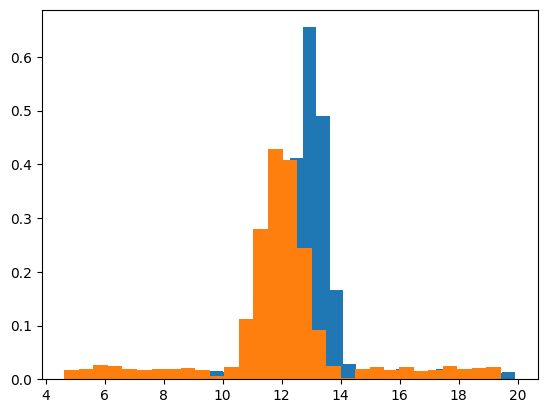

In [6]:
# Histograms

plt.hist(X[:n1], bins=30, density=True)
plt.hist(X[n1:N], bins=30, density=True)
plt.show()

In [7]:
# Sample proportions

p1 = float(n1)/N
p2 = float(n2)/N
print(p1)
print(p2)

0.6153846153846154
0.38461538461538464


In [8]:
# The probilities for each data to be from sample 1 or 2 and to be randomly chosen 

proba_X = []
proba_X = proba_x(X, p1, p2, m1, m2, s1, s2)
proba_X

[[0.9066425645554614, 0.09335743544453846],
 [0.8430522896142968, 0.15694771038570318],
 [0.9156806195767516, 0.08431938042324838],
 [0.943370333728251, 0.05662966627174911],
 [0.8284276974800199, 0.17157230251998018],
 [0.8284303462502367, 0.1715696537497633],
 [0.9441476755103515, 0.05585232448964856],
 [0.9217053667256586, 0.07829463327434137],
 [0.7847983828801178, 0.21520161711988214],
 [0.9095724578150202, 0.09042754218497985],
 [0.7860731191331662, 0.21392688086683376],
 [0.785587512498201, 0.214412487501799],
 [0.8868986679503256, 0.11310133204967437],
 [0.264652344003215, 0.735347655996785],
 [0.34031489058726166, 0.6596851094127384],
 [0.7641724247865117, 0.23582757521348832],
 [0.6323147402144351, 0.36768525978556493],
 [0.893153053968792, 0.10684694603120799],
 [0.6678348420604809, 0.3321651579395191],
 [0.4743435302695302, 0.5256564697304699],
 [0.9424794720631016, 0.05752052793689843],
 [0.8297725849850764, 0.17022741501492347],
 [0.8692874949745598, 0.13071250502544027],

In [9]:
# Gaussian mixture model clustering

proba = np.array(proba_X)
gm = GaussianMixture(n_components=2).fit(proba)
gm.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 2,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [10]:
centers = gm.means_
print(centers)

[[0.80858959 0.19141041]
 [0.10189241 0.89810759]]


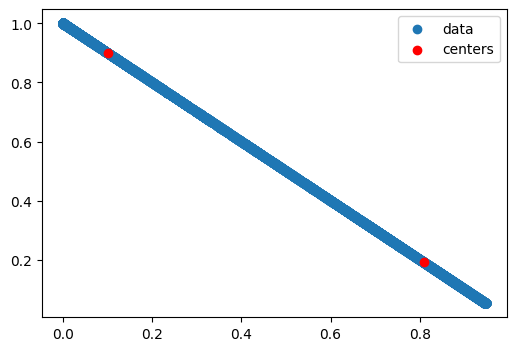

In [11]:
plt.figure(figsize=(6, 4))
plt.scatter(proba[:,0], proba[:,1], label="data")
plt.scatter(centers[:,0], centers[:,1],c='r', label="centers")
plt.legend()
plt.show() 

In [12]:
# Prediction

pred = gm.predict(proba)

y = np.zeros((N))
y[:n1] = np.array((0))
y[n1:N] = np.array((1))

print ('Доля вірно визначених виробів:', round(accuracy_score(y, pred), 3))

Доля вірно визначених виробів: 0.764


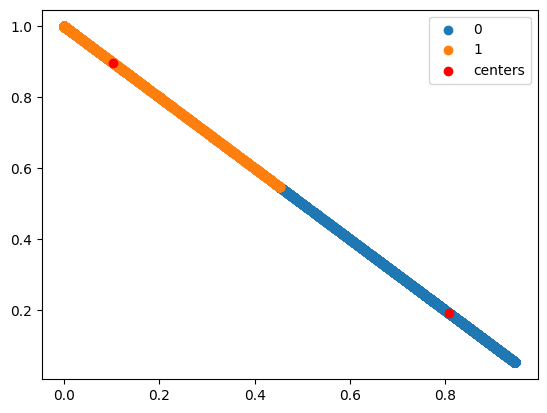

In [13]:
df = DataFrame({'x':proba[:,0], 'y':proba[:,1], 'label':pred})
groups = df.groupby('label')

ig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group.x, group.y, label=name)
plt.scatter(centers[:,0], centers[:,1], c='r', label="centers")
plt.legend()
ax.legend()
plt.show() 